# Thiết lập đường dẫn tổng

In [ ]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.pardir))

# Thêm đường dẫn gốc vào sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# Kiểm tra xem đã nhận chưa
print(f"Project Root: {project_root}")

Project Root: d:\University\HK7\IT_Project\Project\Source


# Khai báo các thư viện / module cần thiết

In [3]:
import pandas as pd

from utils.config import *
from utils.supporter import *

from data.datasets import *
from data.loader import get_data_loader

from engine.trainer import Trainer
from engine.evaluator import *

# Thiết lập cấu hình

In [4]:
spatial_cfg = TrainingConfig('spatial', 'efficientnet')

freq_cfg = TrainingConfig('frequency', 'frequency')
freq_cfg.FREEZE_EPOCHS = 0

hybrid_cfg = TrainingConfig('hybrid', 'efficientnet_fft')

# Tải dữ liệu

In [5]:
# Load data
train_df = pd.read_csv(PathConfig.train_csv)
val_df = pd.read_csv(PathConfig.val_csv)
test_df = pd.read_csv(PathConfig.test_csv)

# Display first few rows of training data
print("Training Data Sample:")
train_df.head()

print("Number of training samples:", len(train_df))
print("Number of validation samples:", len(val_df))
print("Number of test samples:", len(test_df))

Training Data Sample:
Number of training samples: 13866
Number of validation samples: 1981
Number of test samples: 3962


# Khởi tạo Dataset và Data Loader

In [6]:
transforms_dict = get_transforms()

train_dataset = DeepFakeDataset(train_df, transform=transforms_dict['train'])
val_dataset = DeepFakeDataset(val_df, transform=transforms_dict['val'])
test_dataset = DeepFakeDataset(test_df, transform=transforms_dict['test'])

In [7]:
train_loader = get_data_loader(train_dataset, hybrid_cfg, True)
val_loader = get_data_loader(val_dataset, hybrid_cfg, False)
test_loader = get_data_loader(test_dataset, hybrid_cfg, False)

print("DataLoader đã được tạo thành công!")
print(f"Số batch trong tập train: {len(train_loader)}")
print(f"Số batch trong tập val: {len(val_loader)}")
print(f"Số batch trong tập test: {len(test_loader)}")

DataLoader đã được tạo thành công!
Số batch trong tập train: 867
Số batch trong tập val: 124
Số batch trong tập test: 248


In [8]:
for images, labels in train_loader:
    print(f"Kích thước batch ảnh: {images.size()}")
    print(f"Kích thước batch nhãn: {labels.size()}")
    break  # Chỉ kiểm tra batch đầu tiên

Kích thước batch ảnh: torch.Size([16, 3, 224, 224])
Kích thước batch nhãn: torch.Size([16])


# Huấn luyện mô hình - Training

## Mô hình không gian

Huấn luyện dựa trên đặc trưng không gian (spatial feature) -> EfficientNet - B0

### Khởi tạo mô hình

In [8]:
spatial_model = build_model(spatial_cfg)

spatial_trainer = Trainer(
    spatial_model, train_loader, val_loader, spatial_cfg
)

🛠️ Building Model | Mode: spatial | Device: cuda


### Training

In [9]:
spatial_trainer.train()


STARTING TRAINING | Mode: spatial

Epoch 1/10
[INFO] Re-freezing backbone at epoch 0
== Spatial Branch is now Frozen.
[INFO] Detected freeze state change → Rebuilding optimizer...


Epoch 1/10:   0%|          | 0/867 [00:00<?, ?it/s]

Validating: 100%|██████████| 124/124 [00:35<00:00,  3.47it/s]



Epoch 1/10 Summary
Train | Loss: 0.2710 | Acc: 0.8935 | F1: 0.8906
Val   | Loss: 0.9813 | Acc: 0.6325
      | Precision: 0.5778 | Recall: 0.9572 | F1: 0.7206
LR    | 0.000100
   New Best Val Acc: 0.6325
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 124/124 [00:32<00:00,  3.76it/s]



Epoch 2/10 Summary
Train | Loss: 0.1858 | Acc: 0.9272 | F1: 0.9261
Val   | Loss: 1.1807 | Acc: 0.6159
      | Precision: 0.5651 | Recall: 0.9735 | F1: 0.7151
LR    | 0.000100
   Epochs no improve: 1/10

Epoch 3/10


Validating: 100%|██████████| 124/124 [00:35<00:00,  3.52it/s]



Epoch 3/10 Summary
Train | Loss: 0.1560 | Acc: 0.9431 | F1: 0.9423
Val   | Loss: 1.1670 | Acc: 0.6461
      | Precision: 0.5861 | Recall: 0.9715 | F1: 0.7311
LR    | 0.000099
   New Best Val Acc: 0.6461
== Best model saved.

Epoch 4/10
[INFO] Unfreezing backbone at epoch 3
== Spatial Branch is now Unfrozen.
[INFO] Detected freeze state change → Rebuilding optimizer...


Validating: 100%|██████████| 124/124 [00:37<00:00,  3.31it/s]



Epoch 4/10 Summary
Train | Loss: 0.0874 | Acc: 0.9716 | F1: 0.9712
Val   | Loss: 0.0106 | Acc: 0.9970
      | Precision: 0.9949 | Recall: 0.9990 | F1: 0.9969
LR    | 0.000100
   New Best Val Acc: 0.9970
== Best model saved.

Epoch 5/10


Validating: 100%|██████████| 124/124 [00:36<00:00,  3.36it/s]



Epoch 5/10 Summary
Train | Loss: 0.0282 | Acc: 0.9919 | F1: 0.9918
Val   | Loss: 0.0036 | Acc: 0.9995
      | Precision: 1.0000 | Recall: 0.9990 | F1: 0.9995
LR    | 0.000100
   New Best Val Acc: 0.9995
== Best model saved.

Epoch 6/10


Validating: 100%|██████████| 124/124 [00:37<00:00,  3.27it/s]



Epoch 6/10 Summary
Train | Loss: 0.0239 | Acc: 0.9939 | F1: 0.9938
Val   | Loss: 0.0056 | Acc: 0.9975
      | Precision: 0.9959 | Recall: 0.9990 | F1: 0.9975
LR    | 0.000099
   Epochs no improve: 1/10

Epoch 7/10


Validating: 100%|██████████| 124/124 [00:35<00:00,  3.53it/s]



Epoch 7/10 Summary
Train | Loss: 0.0159 | Acc: 0.9959 | F1: 0.9958
Val   | Loss: 0.0041 | Acc: 0.9990
      | Precision: 0.9980 | Recall: 1.0000 | F1: 0.9990
LR    | 0.000098
   Epochs no improve: 2/10

Epoch 8/10


Validating: 100%|██████████| 124/124 [00:34<00:00,  3.57it/s]



Epoch 8/10 Summary
Train | Loss: 0.0130 | Acc: 0.9968 | F1: 0.9967
Val   | Loss: 0.0045 | Acc: 0.9980
      | Precision: 0.9990 | Recall: 0.9969 | F1: 0.9980
LR    | 0.000098
   Epochs no improve: 3/10

Epoch 9/10


Validating: 100%|██████████| 124/124 [00:36<00:00,  3.42it/s]



Epoch 9/10 Summary
Train | Loss: 0.0100 | Acc: 0.9970 | F1: 0.9970
Val   | Loss: 0.0019 | Acc: 0.9995
      | Precision: 0.9990 | Recall: 1.0000 | F1: 0.9995
LR    | 0.000097
   Epochs no improve: 4/10

Epoch 10/10


Validating: 100%|██████████| 124/124 [00:36<00:00,  3.40it/s]



Epoch 10/10 Summary
Train | Loss: 0.0110 | Acc: 0.9973 | F1: 0.9973
Val   | Loss: 0.0005 | Acc: 1.0000
      | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
LR    | 0.000095
   New Best Val Acc: 1.0000
== Best model saved.

Training Completed. Best Acc: 1.0000
History saved to: ..\..\Outputs\efficientnet\logs\training_history.json


### Trực quan kết quả huấn luyện

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\efficientnet\logs\training_history.png


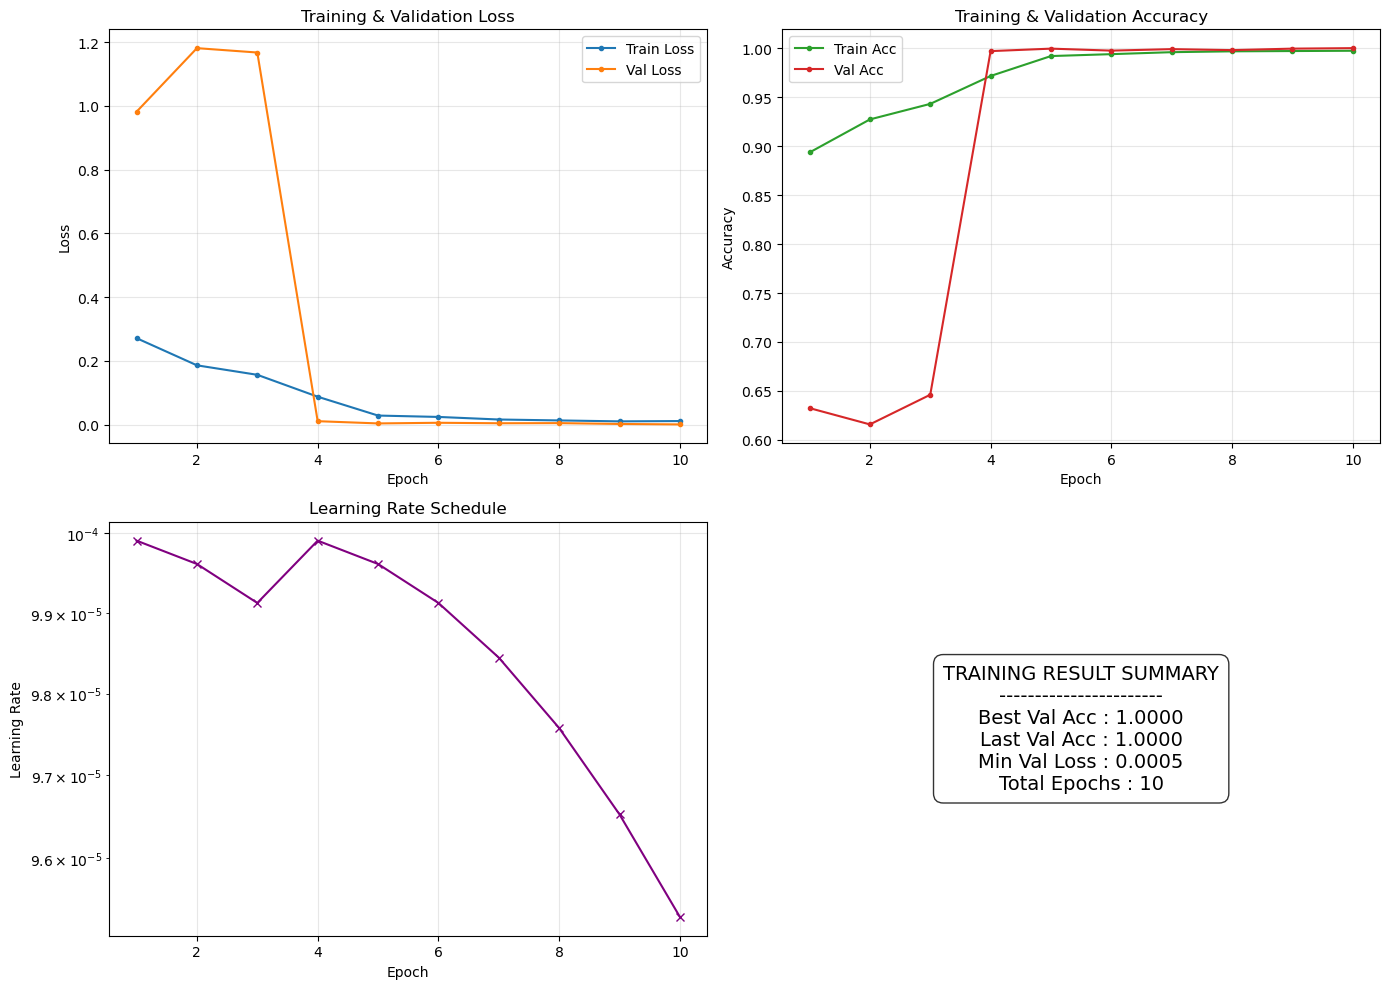

In [10]:
plot_training_history(spatial_trainer.history, spatial_cfg.LOG_DIR)

📊 Đã lưu biểu đồ Validation Metrics tại: ..\..\Outputs\efficientnet\logs\validation_metrics.png


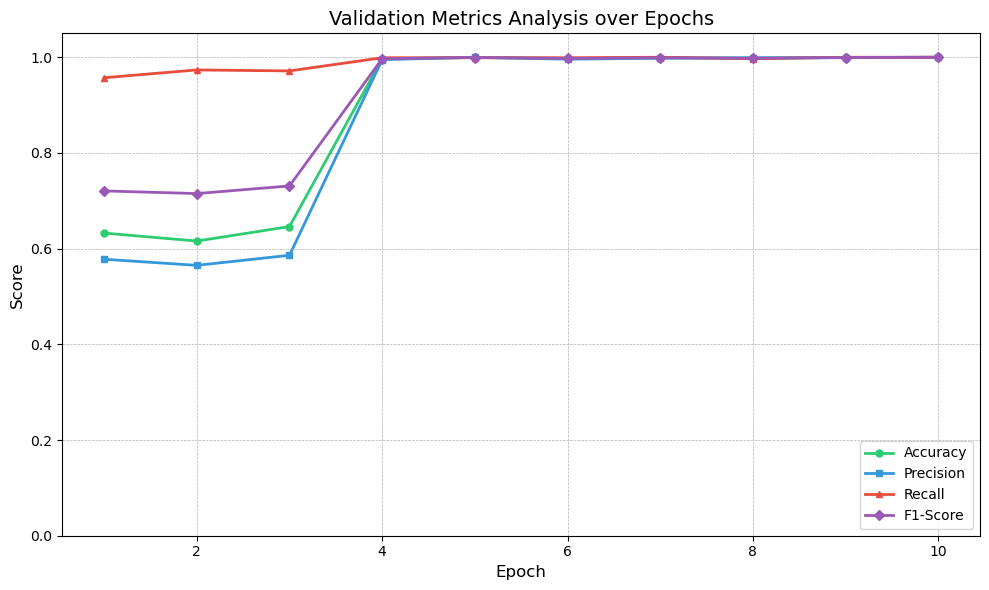

In [11]:
plot_validation_metrics(spatial_trainer.history, spatial_cfg.LOG_DIR)

### Đánh giá trên tập test


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 248/248 [01:54<00:00,  2.18it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.9992
   Precision: 0.9985
   Recall   : 1.0000
   F1 Score : 0.9992

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       1.00      1.00      1.00      2000
        Fake       1.00      1.00      1.00      1962

    accuracy                           1.00      3962
   macro avg       1.00      1.00      1.00      3962
weighted avg       1.00      1.00      1.00      3962

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\efficientnet\logs\evaluation_results\confusion_matrix.png


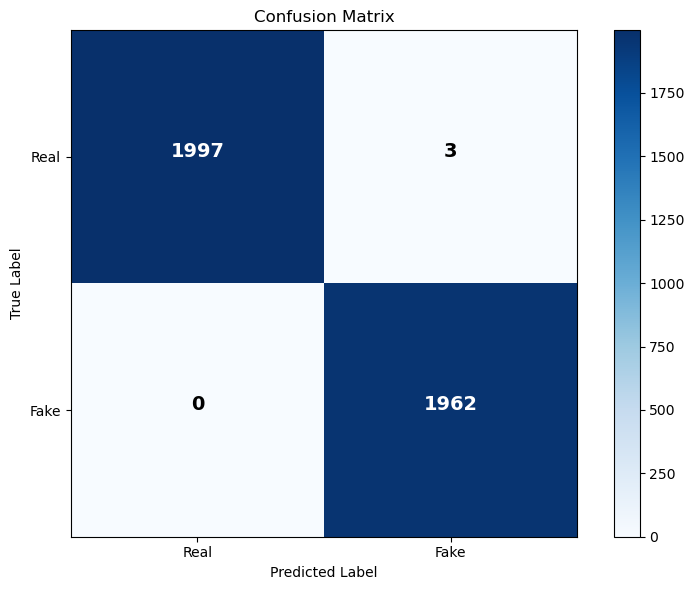

📉 Đã lưu ROC Curve tại: ..\..\Outputs\efficientnet\logs\evaluation_results\roc_curve.png


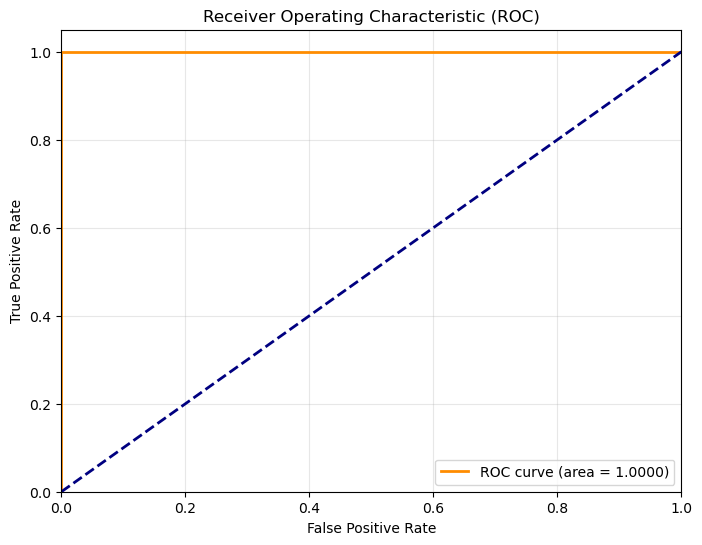

=== ROC AUC Score: 1.0000

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\efficientnet\logs\evaluation_results


In [12]:
evaluate_test_set(spatial_model, test_loader, spatial_cfg.DEVICE, spatial_cfg.LOG_DIR)

Từ model này thì chưa train
## Mô hình tần số 

Phân tích miền tần số - FFT

## Khởi tạo và Training mô hình

In [12]:
freq_model = build_model(freq_cfg)
freq_trainer = Trainer(
    freq_model, train_loader, val_loader, freq_cfg
)

freq_trainer.train()

🛠️ Building Model | Mode: frequency | Device: cuda

STARTING TRAINING | Mode: frequency

Epoch 1/10


Validating: 100%|██████████| 124/124 [00:36<00:00,  3.42it/s]



Epoch 1/10 Summary
Train | Loss: 0.4143 | Acc: 0.8113 | F1: 0.8010
Val   | Loss: 0.3004 | Acc: 0.8844
      | Precision: 0.9747 | Recall: 0.7870 | F1: 0.8708
LR    | 0.000100
   New Best Val Acc: 0.8844
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 124/124 [00:38<00:00,  3.19it/s]



Epoch 2/10 Summary
Train | Loss: 0.3694 | Acc: 0.8418 | F1: 0.8336
Val   | Loss: 0.2468 | Acc: 0.8965
      | Precision: 0.9163 | Recall: 0.8705 | F1: 0.8928
LR    | 0.000100
   New Best Val Acc: 0.8965
== Best model saved.

Epoch 3/10


Validating: 100%|██████████| 124/124 [00:32<00:00,  3.87it/s]



Epoch 3/10 Summary
Train | Loss: 0.3512 | Acc: 0.8486 | F1: 0.8420
Val   | Loss: 0.3619 | Acc: 0.8496
      | Precision: 0.7834 | Recall: 0.9623 | F1: 0.8637
LR    | 0.000099
   Epochs no improve: 1/10

Epoch 4/10


Validating: 100%|██████████| 124/124 [00:31<00:00,  3.88it/s]



Epoch 4/10 Summary
Train | Loss: 0.3310 | Acc: 0.8558 | F1: 0.8501
Val   | Loss: 0.5116 | Acc: 0.8647
      | Precision: 0.9931 | Recall: 0.7319 | F1: 0.8427
LR    | 0.000098
   Epochs no improve: 2/10

Epoch 5/10


Validating: 100%|██████████| 124/124 [00:33<00:00,  3.70it/s]



Epoch 5/10 Summary
Train | Loss: 0.3218 | Acc: 0.8615 | F1: 0.8557
Val   | Loss: 0.4366 | Acc: 0.8087
      | Precision: 0.7260 | Recall: 0.9857 | F1: 0.8361
LR    | 0.000098
   Epochs no improve: 3/10

Epoch 6/10


Validating: 100%|██████████| 124/124 [00:32<00:00,  3.86it/s]



Epoch 6/10 Summary
Train | Loss: 0.3072 | Acc: 0.8714 | F1: 0.8668
Val   | Loss: 0.3661 | Acc: 0.8677
      | Precision: 0.9959 | Recall: 0.7360 | F1: 0.8464
LR    | 0.000097
   Epochs no improve: 4/10

Epoch 7/10


Validating: 100%|██████████| 124/124 [00:31<00:00,  3.89it/s]



Epoch 7/10 Summary
Train | Loss: 0.2963 | Acc: 0.8757 | F1: 0.8709
Val   | Loss: 0.3608 | Acc: 0.8375
      | Precision: 0.7560 | Recall: 0.9918 | F1: 0.8580
LR    | 0.000095
   Epochs no improve: 5/10

Epoch 8/10


Validating: 100%|██████████| 124/124 [00:33<00:00,  3.66it/s]



Epoch 8/10 Summary
Train | Loss: 0.2911 | Acc: 0.8764 | F1: 0.8721
Val   | Loss: 0.1542 | Acc: 0.9379
      | Precision: 0.9544 | Recall: 0.9185 | F1: 0.9361
LR    | 0.000094
   New Best Val Acc: 0.9379
== Best model saved.

Epoch 9/10


Validating: 100%|██████████| 124/124 [00:32<00:00,  3.85it/s]



Epoch 9/10 Summary
Train | Loss: 0.2704 | Acc: 0.8903 | F1: 0.8874
Val   | Loss: 0.1461 | Acc: 0.9399
      | Precision: 0.9407 | Recall: 0.9378 | F1: 0.9393
LR    | 0.000092
   New Best Val Acc: 0.9399
== Best model saved.

Epoch 10/10


Validating: 100%|██████████| 124/124 [00:31<00:00,  3.97it/s]


Epoch 10/10 Summary
Train | Loss: 0.2627 | Acc: 0.8911 | F1: 0.8880
Val   | Loss: 0.1455 | Acc: 0.9480
      | Precision: 0.9554 | Recall: 0.9388 | F1: 0.9470
LR    | 0.000091
   New Best Val Acc: 0.9480
== Best model saved.

Training Completed. Best Acc: 0.9480
History saved to: ..\..\Outputs\frequency\logs\training_history.json


📈 Đã lưu biểu đồ training tại: ..\..\Outputs\frequency\logs\training_history.png


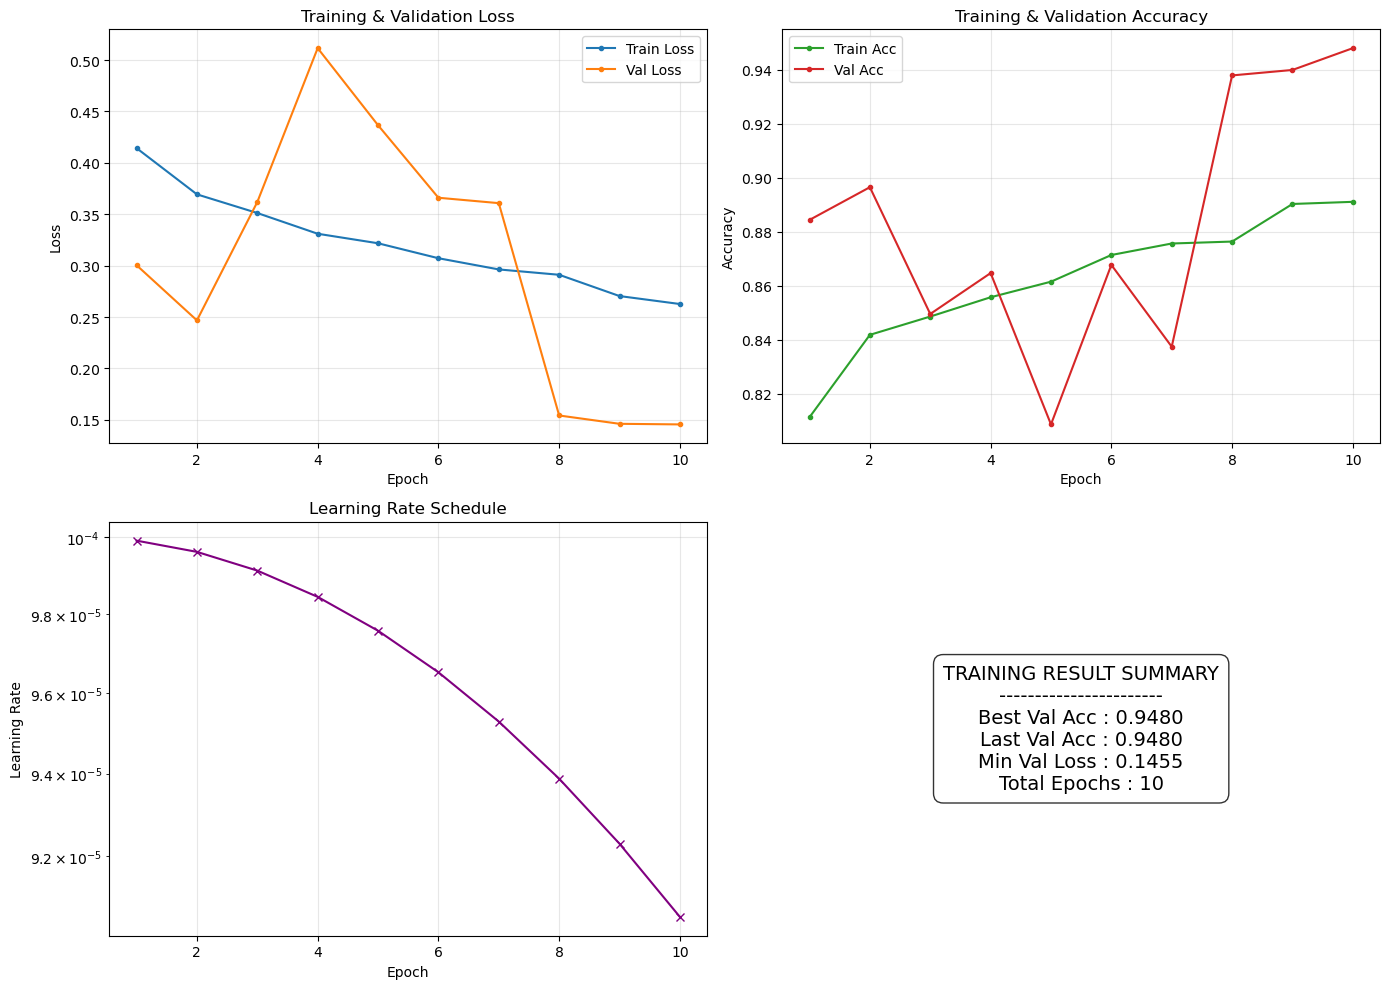

In [13]:
plot_training_history(freq_trainer.history, freq_cfg.LOG_DIR)


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 248/248 [01:46<00:00,  2.32it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.9475
   Precision: 0.9434
   Recall   : 0.9511
   F1 Score : 0.9472

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       0.95      0.94      0.95      2000
        Fake       0.94      0.95      0.95      1962

    accuracy                           0.95      3962
   macro avg       0.95      0.95      0.95      3962
weighted avg       0.95      0.95      0.95      3962

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\frequency\logs\evaluation_results\confusion_matrix.png


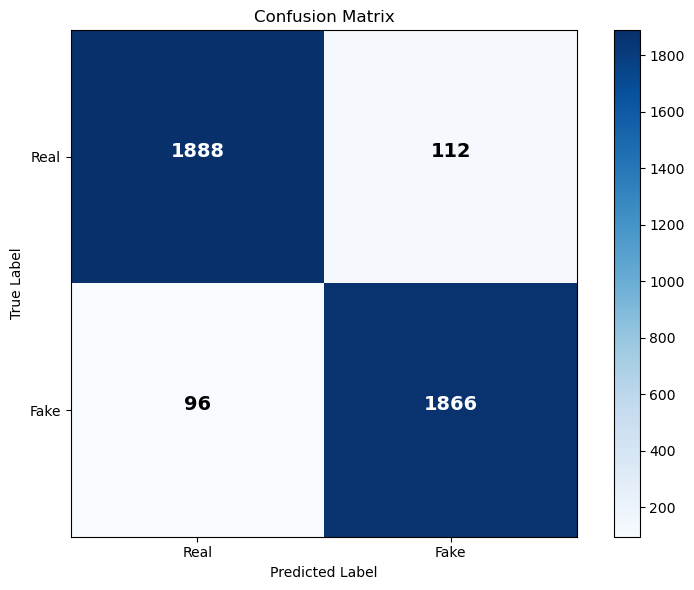

📉 Đã lưu ROC Curve tại: ..\..\Outputs\frequency\logs\evaluation_results\roc_curve.png


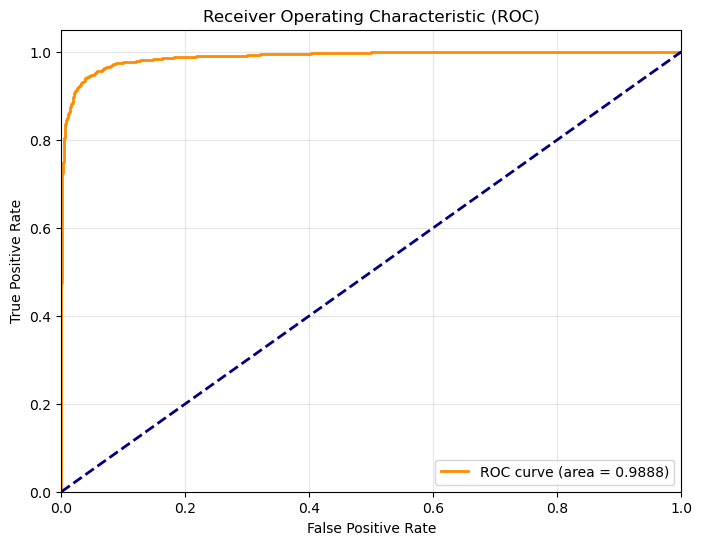

=== ROC AUC Score: 0.9888

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\frequency\logs\evaluation_results


In [14]:
evaluate_test_set(freq_model, test_loader, freq_cfg.DEVICE, freq_cfg.LOG_DIR)

## Mô hình kết hợp

In [9]:
hybrid_model = build_model(hybrid_cfg)
hybrid_trainer = Trainer(
    hybrid_model, train_loader, val_loader, hybrid_cfg
)

hybrid_trainer.train()

🛠️ Building Model | Mode: hybrid | Device: cuda

STARTING TRAINING | Mode: hybrid

Epoch 1/10
[INFO] Re-freezing backbone at epoch 0
== Spatial Branch is now Frozen.
[INFO] Detected freeze state change → Rebuilding optimizer...


Validating: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]


Epoch 1/10 Summary
Train | Loss: 0.2301 | Acc: 0.9074 | F1: 0.9047
Val   | Loss: 0.6370 | Acc: 0.7229
      | Precision: 0.6477 | Recall: 0.9653 | F1: 0.7753
LR    | 0.000100
   New Best Val Acc: 0.7229


== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 124/124 [00:38<00:00,  3.21it/s]



Epoch 2/10 Summary
Train | Loss: 0.1506 | Acc: 0.9426 | F1: 0.9415
Val   | Loss: 0.2736 | Acc: 0.8869
      | Precision: 0.8547 | Recall: 0.9297 | F1: 0.8906
LR    | 0.000100
   New Best Val Acc: 0.8869
== Best model saved.

Epoch 3/10


Validating: 100%|██████████| 124/124 [00:40<00:00,  3.06it/s]



Epoch 3/10 Summary
Train | Loss: 0.1303 | Acc: 0.9512 | F1: 0.9504
Val   | Loss: 1.0426 | Acc: 0.6805
      | Precision: 0.6117 | Recall: 0.9715 | F1: 0.7507
LR    | 0.000099
   Epochs no improve: 1/10

Epoch 4/10
[INFO] Unfreezing backbone at epoch 3
== Spatial Branch is now Unfrozen.
[INFO] Detected freeze state change → Rebuilding optimizer...


Validating: 100%|██████████| 124/124 [00:38<00:00,  3.20it/s]



Epoch 4/10 Summary
Train | Loss: 0.0788 | Acc: 0.9751 | F1: 0.9748
Val   | Loss: 0.0077 | Acc: 0.9975
      | Precision: 0.9990 | Recall: 0.9959 | F1: 0.9974
LR    | 0.000100
   New Best Val Acc: 0.9975
== Best model saved.

Epoch 5/10


Validating: 100%|██████████| 124/124 [00:37<00:00,  3.31it/s]



Epoch 5/10 Summary
Train | Loss: 0.0298 | Acc: 0.9904 | F1: 0.9903
Val   | Loss: 0.0035 | Acc: 0.9990
      | Precision: 0.9990 | Recall: 0.9990 | F1: 0.9990
LR    | 0.000100
   New Best Val Acc: 0.9990
== Best model saved.

Epoch 6/10


Validating: 100%|██████████| 124/124 [00:35<00:00,  3.49it/s]



Epoch 6/10 Summary
Train | Loss: 0.0202 | Acc: 0.9948 | F1: 0.9948
Val   | Loss: 0.0050 | Acc: 0.9985
      | Precision: 0.9970 | Recall: 1.0000 | F1: 0.9985
LR    | 0.000099
   Epochs no improve: 1/10

Epoch 7/10


Validating: 100%|██████████| 124/124 [00:36<00:00,  3.43it/s]



Epoch 7/10 Summary
Train | Loss: 0.0179 | Acc: 0.9955 | F1: 0.9955
Val   | Loss: 0.0011 | Acc: 0.9995
      | Precision: 0.9990 | Recall: 1.0000 | F1: 0.9995
LR    | 0.000098
   New Best Val Acc: 0.9995
== Best model saved.

Epoch 8/10


Validating: 100%|██████████| 124/124 [00:37<00:00,  3.30it/s]



Epoch 8/10 Summary
Train | Loss: 0.0166 | Acc: 0.9960 | F1: 0.9960
Val   | Loss: 0.0047 | Acc: 0.9980
      | Precision: 0.9990 | Recall: 0.9969 | F1: 0.9980
LR    | 0.000098
   Epochs no improve: 1/10

Epoch 9/10


Validating: 100%|██████████| 124/124 [00:38<00:00,  3.18it/s]



Epoch 9/10 Summary
Train | Loss: 0.0105 | Acc: 0.9970 | F1: 0.9970
Val   | Loss: 0.0007 | Acc: 0.9995
      | Precision: 0.9990 | Recall: 1.0000 | F1: 0.9995
LR    | 0.000097
   Epochs no improve: 2/10

Epoch 10/10


Validating: 100%|██████████| 124/124 [00:39<00:00,  3.18it/s]



Epoch 10/10 Summary
Train | Loss: 0.0079 | Acc: 0.9971 | F1: 0.9971
Val   | Loss: 0.0001 | Acc: 1.0000
      | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
LR    | 0.000095
   New Best Val Acc: 1.0000
== Best model saved.

Training Completed. Best Acc: 1.0000
History saved to: ..\..\Outputs\efficientnet_fft\logs\training_history.json


### Trực quan kết quả huấn luyện

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\efficientnet_fft\logs\training_history.png


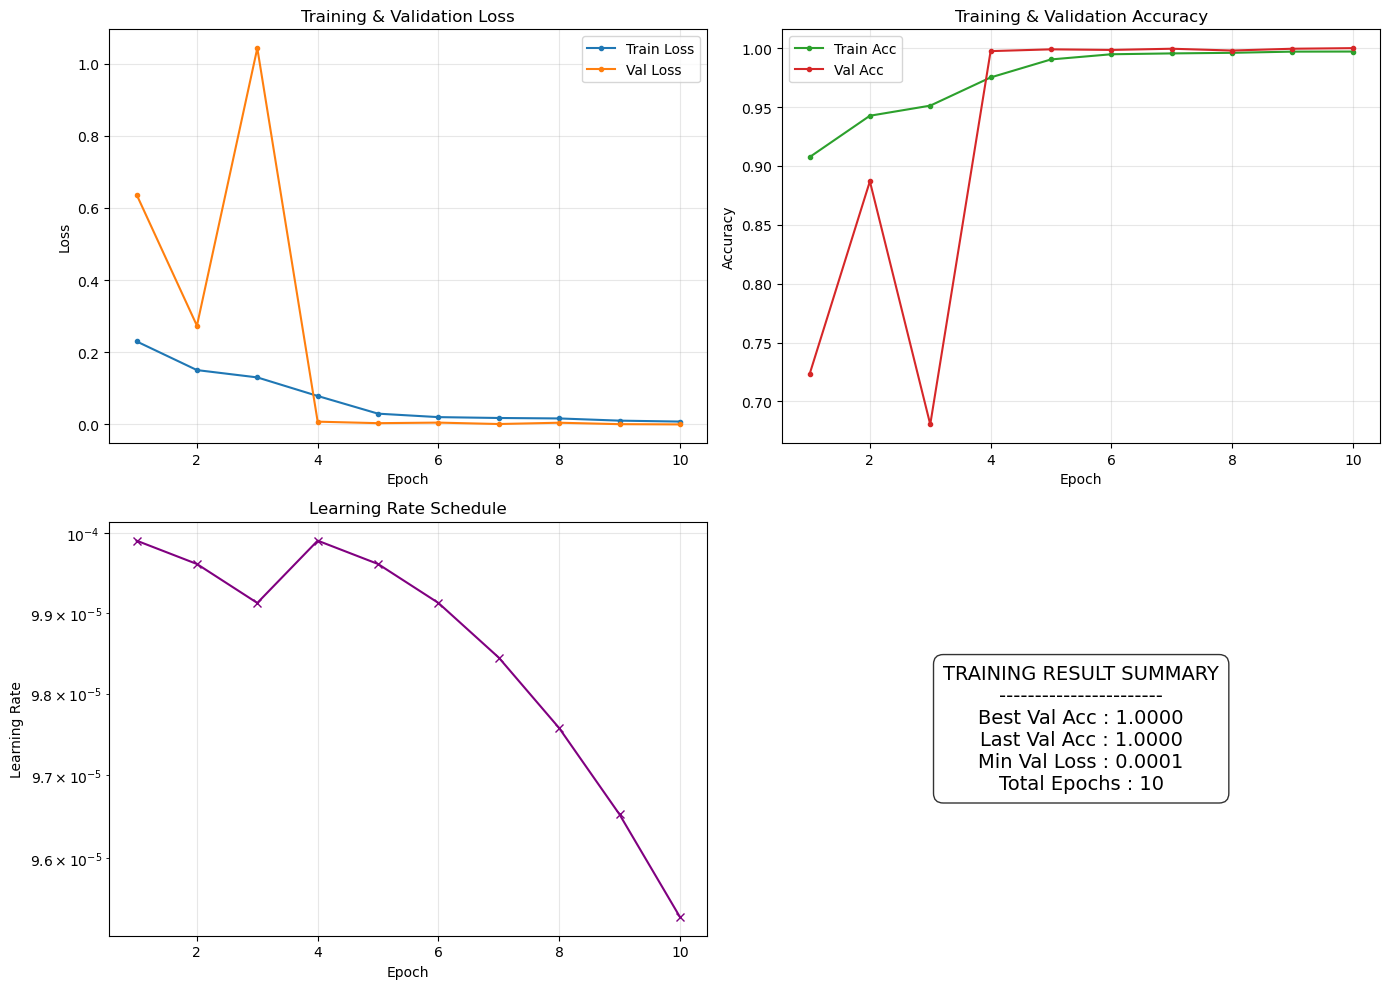

In [10]:
plot_training_history(hybrid_trainer.history, hybrid_cfg.LOG_DIR)

### Đánh giá mô hình trên tập test


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 248/248 [02:11<00:00,  1.88it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.9997
   Precision: 0.9995
   Recall   : 1.0000
   F1 Score : 0.9997

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       1.00      1.00      1.00      2000
        Fake       1.00      1.00      1.00      1962

    accuracy                           1.00      3962
   macro avg       1.00      1.00      1.00      3962
weighted avg       1.00      1.00      1.00      3962

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\efficientnet_fft\logs\evaluation_results\confusion_matrix.png


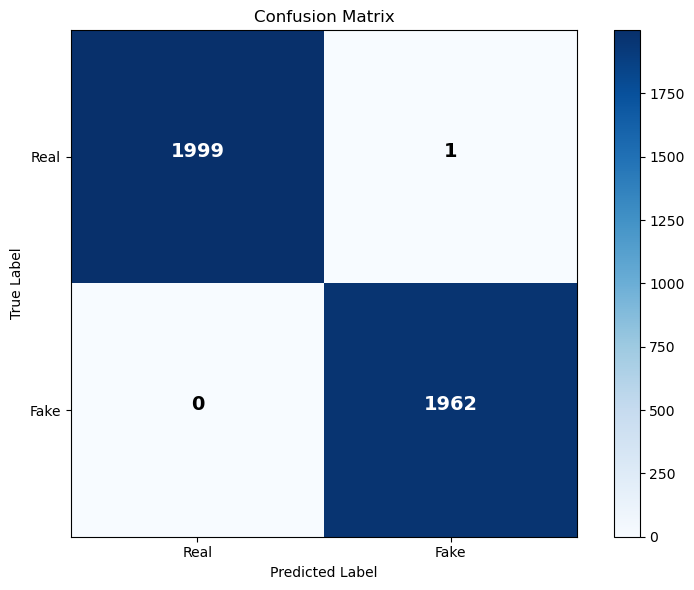

📉 Đã lưu ROC Curve tại: ..\..\Outputs\efficientnet_fft\logs\evaluation_results\roc_curve.png


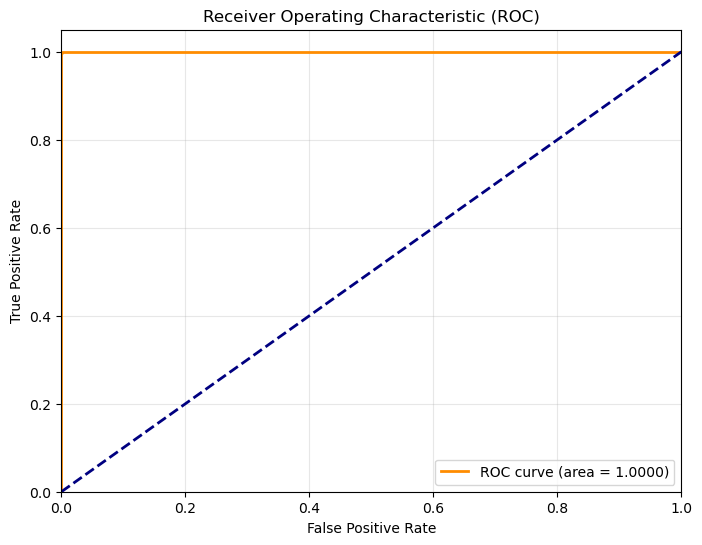

=== ROC AUC Score: 1.0000

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\efficientnet_fft\logs\evaluation_results


In [11]:
evaluate_test_set(hybrid_model, test_loader, hybrid_cfg.DEVICE, hybrid_cfg.LOG_DIR)